In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from time import time
import os
from IPython.utils import traitlets as _traitlets
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras import metrics

from sklearn.model_selection import train_test_split

### Carica i dati e aggrega per numero cella - considera i dati di una sola cella

In [43]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
# 488-1258
# 488-1264
agg_by_cell = data.groupby(by = ['cell_num'])
one_cell = agg_by_cell.get_group('488-1258')
series = one_cell['nr_people'].values
print(type(series))

<class 'numpy.ndarray'>


In [44]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# choose a number of time steps for the window
n_steps = 25

# split into samples
X, y = split_sequence(series, n_steps)

count = 0
# summarize the data
for i in range(len(X)):
    count +=1
    if count > 1: 
        break
    print(X[i], y[i])    

[70. 71. 67. 66. 63. 63. 60. 58. 57. 55. 53. 50. 50. 47. 45. 44. 43. 42.
 40. 40. 40. 40. 41. 42. 42.] 40.0


### Normalizzazione 

In [45]:
# define scaler
#scaler = MinMaxScaler()

# fit scaler on data
#scaler.fit(X)
# apply transform

#X = scaler.transform(X)
#print(X[0:10])

# fit scaler on data
#y = y.reshape(-1, 1)
#scaler.fit(y)

# apply transform
#y = scaler.transform(y)
#print(y[0:10])

### Train-validation-test

In [46]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)
#train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=1)
#print(len(train_X), len(train_y), len(test_X), len(test_y), len(val_X), len(val_y))

train_X, test_X, train_y, test_y = X[:8000], X[8000:], y[:8000], y[8000:]

### Un primo test del modello

In [47]:
# define model
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=n_steps)) 
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])

model.fit(train_X, train_y, epochs=500, verbose=2)

Epoch 1/500
 - 0s - loss: 117.6869 - mean_absolute_error: 6.2699 - accuracy: 0.0764
Epoch 2/500
 - 0s - loss: 11.4240 - mean_absolute_error: 2.5840 - accuracy: 0.1367
Epoch 3/500
 - 0s - loss: 8.6296 - mean_absolute_error: 2.2398 - accuracy: 0.1531
Epoch 4/500
 - 0s - loss: 7.4715 - mean_absolute_error: 2.0793 - accuracy: 0.1690
Epoch 5/500
 - 0s - loss: 7.7735 - mean_absolute_error: 2.1461 - accuracy: 0.1536
Epoch 6/500
 - 0s - loss: 6.1351 - mean_absolute_error: 1.8697 - accuracy: 0.1842
Epoch 7/500
 - 0s - loss: 6.4385 - mean_absolute_error: 1.9361 - accuracy: 0.1784
Epoch 8/500
 - 0s - loss: 5.8730 - mean_absolute_error: 1.8392 - accuracy: 0.1829
Epoch 9/500
 - 0s - loss: 5.6244 - mean_absolute_error: 1.7923 - accuracy: 0.1974
Epoch 10/500
 - 0s - loss: 5.6725 - mean_absolute_error: 1.8134 - accuracy: 0.1832
Epoch 11/500
 - 0s - loss: 6.5458 - mean_absolute_error: 1.9487 - accuracy: 0.1786
Epoch 12/500
 - 0s - loss: 5.8838 - mean_absolute_error: 1.8289 - accuracy: 0.1931
Epoch 13/5

Epoch 100/500
 - 0s - loss: 3.8497 - mean_absolute_error: 1.4432 - accuracy: 0.2366
Epoch 101/500
 - 0s - loss: 4.4293 - mean_absolute_error: 1.5765 - accuracy: 0.2176
Epoch 102/500
 - 0s - loss: 4.0471 - mean_absolute_error: 1.4834 - accuracy: 0.2321
Epoch 103/500
 - 0s - loss: 4.2613 - mean_absolute_error: 1.5312 - accuracy: 0.2276
Epoch 104/500
 - 0s - loss: 4.2157 - mean_absolute_error: 1.5327 - accuracy: 0.2219
Epoch 105/500
 - 0s - loss: 4.0548 - mean_absolute_error: 1.4903 - accuracy: 0.2333
Epoch 106/500
 - 0s - loss: 4.1588 - mean_absolute_error: 1.5122 - accuracy: 0.2272
Epoch 107/500
 - 0s - loss: 3.9803 - mean_absolute_error: 1.4858 - accuracy: 0.2249
Epoch 108/500
 - 0s - loss: 4.1583 - mean_absolute_error: 1.5097 - accuracy: 0.2315
Epoch 109/500
 - 0s - loss: 4.1424 - mean_absolute_error: 1.5174 - accuracy: 0.2281
Epoch 110/500
 - 0s - loss: 4.0465 - mean_absolute_error: 1.4982 - accuracy: 0.2290
Epoch 111/500
 - 0s - loss: 4.1445 - mean_absolute_error: 1.5162 - accuracy:

Epoch 198/500
 - 0s - loss: 3.9733 - mean_absolute_error: 1.4763 - accuracy: 0.2336
Epoch 199/500
 - 0s - loss: 3.7329 - mean_absolute_error: 1.4209 - accuracy: 0.2364
Epoch 200/500
 - 0s - loss: 4.0433 - mean_absolute_error: 1.4872 - accuracy: 0.2387
Epoch 201/500
 - 0s - loss: 3.8462 - mean_absolute_error: 1.4424 - accuracy: 0.2396
Epoch 202/500
 - 0s - loss: 3.8699 - mean_absolute_error: 1.4486 - accuracy: 0.2384
Epoch 203/500
 - 0s - loss: 3.9510 - mean_absolute_error: 1.4671 - accuracy: 0.2426
Epoch 204/500
 - 0s - loss: 4.0698 - mean_absolute_error: 1.4940 - accuracy: 0.2305
Epoch 205/500
 - 0s - loss: 4.0901 - mean_absolute_error: 1.5037 - accuracy: 0.2262
Epoch 206/500
 - 0s - loss: 3.8284 - mean_absolute_error: 1.4380 - accuracy: 0.2385
Epoch 207/500
 - 0s - loss: 4.1479 - mean_absolute_error: 1.5140 - accuracy: 0.2234
Epoch 208/500
 - 0s - loss: 4.0872 - mean_absolute_error: 1.4979 - accuracy: 0.2305
Epoch 209/500
 - 0s - loss: 4.1142 - mean_absolute_error: 1.5091 - accuracy:

Epoch 296/500
 - 0s - loss: 3.8504 - mean_absolute_error: 1.4513 - accuracy: 0.2307
Epoch 297/500
 - 0s - loss: 3.7936 - mean_absolute_error: 1.4395 - accuracy: 0.2338
Epoch 298/500
 - 0s - loss: 3.8975 - mean_absolute_error: 1.4581 - accuracy: 0.2409
Epoch 299/500
 - 0s - loss: 3.9528 - mean_absolute_error: 1.4693 - accuracy: 0.2331
Epoch 300/500
 - 0s - loss: 4.0200 - mean_absolute_error: 1.4782 - accuracy: 0.2361
Epoch 301/500
 - 0s - loss: 3.8057 - mean_absolute_error: 1.4404 - accuracy: 0.2368
Epoch 302/500
 - 0s - loss: 3.8541 - mean_absolute_error: 1.4471 - accuracy: 0.2411
Epoch 303/500
 - 0s - loss: 3.7795 - mean_absolute_error: 1.4312 - accuracy: 0.2393
Epoch 304/500
 - 0s - loss: 3.7479 - mean_absolute_error: 1.4165 - accuracy: 0.2517
Epoch 305/500
 - 0s - loss: 3.7154 - mean_absolute_error: 1.4206 - accuracy: 0.2393
Epoch 306/500
 - 0s - loss: 3.7389 - mean_absolute_error: 1.4183 - accuracy: 0.2466
Epoch 307/500
 - 0s - loss: 3.9626 - mean_absolute_error: 1.4663 - accuracy:

Epoch 394/500
 - 0s - loss: 3.8856 - mean_absolute_error: 1.4587 - accuracy: 0.2275
Epoch 395/500
 - 0s - loss: 3.8035 - mean_absolute_error: 1.4359 - accuracy: 0.2428
Epoch 396/500
 - 0s - loss: 3.8337 - mean_absolute_error: 1.4473 - accuracy: 0.2381
Epoch 397/500
 - 0s - loss: 3.9191 - mean_absolute_error: 1.4592 - accuracy: 0.2395
Epoch 398/500
 - 0s - loss: 3.8140 - mean_absolute_error: 1.4447 - accuracy: 0.2360
Epoch 399/500
 - 0s - loss: 3.7157 - mean_absolute_error: 1.4183 - accuracy: 0.2418
Epoch 400/500
 - 0s - loss: 3.7671 - mean_absolute_error: 1.4302 - accuracy: 0.2415
Epoch 401/500
 - 0s - loss: 3.8608 - mean_absolute_error: 1.4470 - accuracy: 0.2395
Epoch 402/500
 - 0s - loss: 3.6790 - mean_absolute_error: 1.4097 - accuracy: 0.2460
Epoch 403/500
 - 0s - loss: 3.9574 - mean_absolute_error: 1.4692 - accuracy: 0.2386
Epoch 404/500
 - 0s - loss: 3.8744 - mean_absolute_error: 1.4463 - accuracy: 0.2489
Epoch 405/500
 - 0s - loss: 3.7701 - mean_absolute_error: 1.4305 - accuracy:

Epoch 492/500
 - 0s - loss: 3.7585 - mean_absolute_error: 1.4248 - accuracy: 0.2412
Epoch 493/500
 - 0s - loss: 3.7261 - mean_absolute_error: 1.4182 - accuracy: 0.2431
Epoch 494/500
 - 0s - loss: 3.6816 - mean_absolute_error: 1.4073 - accuracy: 0.2454
Epoch 495/500
 - 0s - loss: 3.7488 - mean_absolute_error: 1.4164 - accuracy: 0.2470
Epoch 496/500
 - 0s - loss: 3.6787 - mean_absolute_error: 1.4060 - accuracy: 0.2470
Epoch 497/500
 - 0s - loss: 3.6237 - mean_absolute_error: 1.3909 - accuracy: 0.2495
Epoch 498/500
 - 0s - loss: 3.8849 - mean_absolute_error: 1.4538 - accuracy: 0.2389
Epoch 499/500
 - 0s - loss: 3.6392 - mean_absolute_error: 1.4000 - accuracy: 0.2440
Epoch 500/500
 - 0s - loss: 3.7578 - mean_absolute_error: 1.4283 - accuracy: 0.2494


### Una prima previsione

In [48]:
x_input = np.array([[34., 33., 32., 33., 32. ,30. ,30., 29. ,29.,27., 27., 25., 24., 23. ,22. ,21., 20., 20.,
                     19., 19., 18., 18. ,18. ,19., 21.]] )
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat[0])

[22.619461]


### Calcolo dell'errore di previsione

In [49]:
# compute error
predicted = np.array([])

for i in range(len(test_X)):
    x_input = test_X[i].reshape((1, n_steps))
    yhat = model.predict(x_input, verbose=0)
    predicted = np.append(predicted, yhat[0]) 

expected = test_y
#predicted = predicted.reshape(-1, 1)  
 
#predicted = scaler.inverse_transform(predicted)
#expected = scaler.inverse_transform(test_y)    
   
# abs difference
difference = abs((expected - predicted))

### Distribuzione dell'errore

Mean Absolute Error =  1.293647364778491


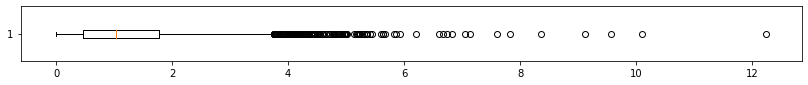

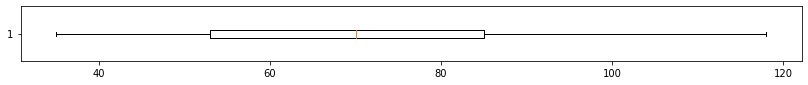

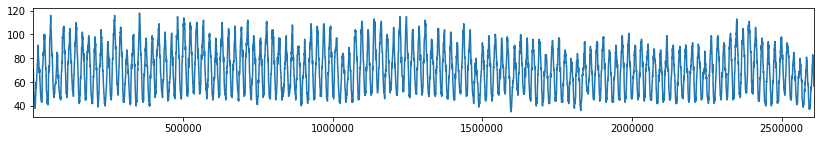

In [50]:
# show boxplot
plt.figure(figsize = (14,1))
plt.boxplot(difference, vert= False);
print('Mean Absolute Error = ', np.mean(difference))

# show boxplot
plt.figure(figsize = (14,1))
plt.boxplot(series, vert= False);
plt.show()

# show boxplot
plt.figure(figsize = (14,2))
one_cell['nr_people'].plot()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

difference2 = mean_squared_error(expected, predicted)
print('Mean Squared Error = ', difference2)

Mean Squared Error =  2.9103245489959106


### Calcolo del numero ottimale di neuroni per la rete neurale

number of nodes=1: 0.269
number of nodes=2: 0.270
number of nodes=3: 0.230
number of nodes=4: 0.234
number of nodes=5: 0.241
number of nodes=6: 0.202


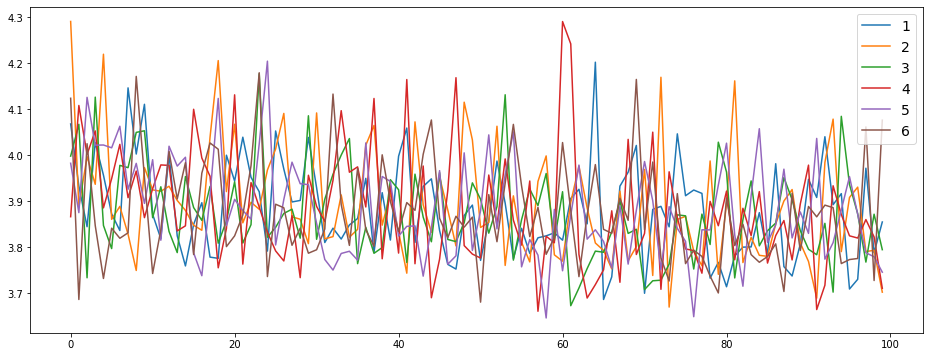

In [34]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, train_X, train_y, val_X, val_y):
    
    # define model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=n_steps)) 
    model.add(Dense(1))

    model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])

    model.fit(train_X, train_y, epochs=200, verbose=0)

    history = model.fit(train_X, train_y, epochs=100, verbose=0)
    unk1, unk2, test_acc = model.evaluate(val_X, val_y, verbose=0)
    return history, test_acc  

plt.figure(figsize = (16, 6))
num_nodes = [1, 2, 3, 4, 5, 6]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, train_X, train_y, val_X, val_y)
    # summarize final test set accuracy
    print('number of nodes=%d: %.3f' % (n_nodes, result))
    
    # plot learning curve 
    plt.plot(history.history['loss'], label=str(n_nodes))

# show the plot
plt.legend(prop={'size': 14})
plt.show()

### Come varia il loss e l'accuracy a un numero di epoch grandi

In [35]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=n_steps, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=[metrics.mae, 'accuracy'])

# fit model
history = model.fit(train_X, train_y, validation_data=(val_X, val_y), 
                    epochs=4000, verbose=0) 

# evaluate the model
train_acc = model.evaluate(train_X, train_y, verbose=0)
print(train_acc)
val_acc = model.evaluate(val_X, val_y, verbose=0)

print('Train: %.3f, Val: %.3f' % (train_acc[2], val_acc[2]))
print(model.metrics_names)

# plot loss learning curves
plt.figure(figsize = (15, 8))
plt.subplot(211)
plt.title('MSE Loss', pad=-40)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='val')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

KeyboardInterrupt: 

### Fermare il traning al momento giusto - tollerare il loss con il parametro patience 

Epoch 00456: early stopping
2357/2357 [==============================] - 0s 15us/step
[3.445437180519104, 1.3743984699249268, 0.23600000143051147] [3.027976065456842, 1.3250930309295654, 0.24734832346439362]
['loss', 'mean_absolute_error', 'accuracy']
Train: 0.236, Val: 0.247
['loss', 'mean_absolute_error', 'accuracy']


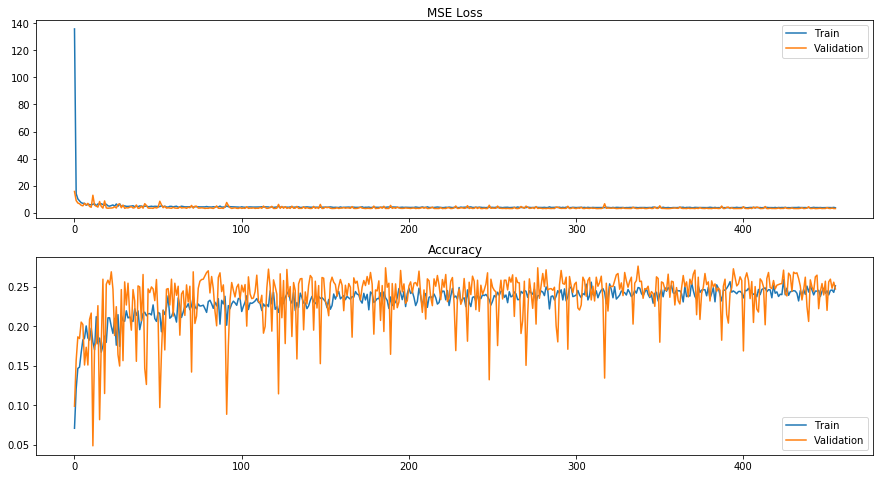

In [41]:
# import EarlyStopping
from keras.callbacks import EarlyStopping
# define model
model = Sequential()
model.add(Dense(500, input_dim=n_steps, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=[metrics.mae, 'accuracy'])

# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# fit model
history = model.fit(train_X, train_y, validation_data=(val_X, val_y), 
                    epochs=4000, verbose=0, callbacks=[es]) 

# evaluate the model
train_acc = model.evaluate(train_X, train_y, verbose=1)

val_acc = model.evaluate(val_X, val_y, verbose=1)
print(train_acc, val_acc)
print(model.metrics_names)
print('Train: %.3f, Val: %.3f' % (train_acc[2], val_acc[2]))
print(model.metrics_names)
# plot loss learning curves
plt.figure(figsize = (15, 8))
plt.subplot(211)
plt.title('MSE Loss', pad=-40)
plt.plot(history.history['loss'], label='Train') 
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='Train') 
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

### Salva il modello

In [ ]:
model.save('MLP_early_stopping_model.h5')

### Calcola errore per tutte le celle 

486-1252


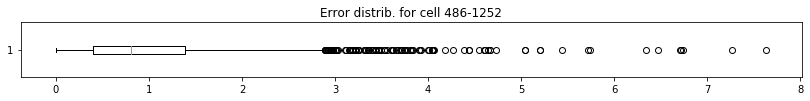

Mean Absolute Error =  1.0343516941263218
iteration =  1
486-1253


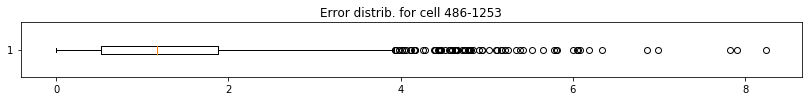

Mean Absolute Error =  1.3606928653909702
iteration =  2
486-1254


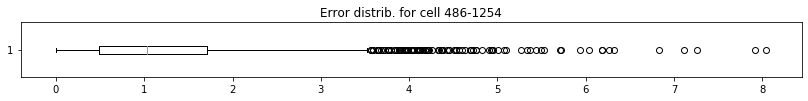

Mean Absolute Error =  1.2599499619609178
iteration =  3
486-1255


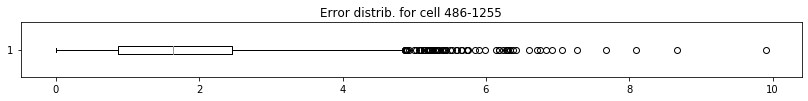

Mean Absolute Error =  1.8104071314647945
iteration =  4
486-1256


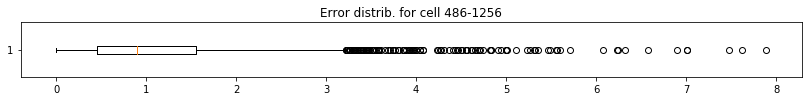

Mean Absolute Error =  1.1746738418424973
iteration =  5
486-1257


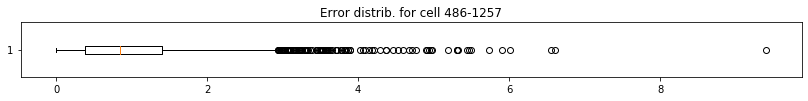

Mean Absolute Error =  1.051889780988597
iteration =  6
486-1258


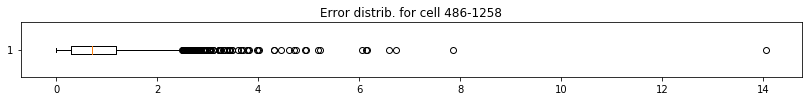

Mean Absolute Error =  0.8842292662341186
iteration =  7
486-1259


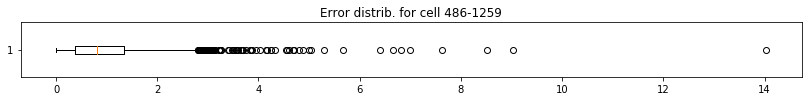

Mean Absolute Error =  0.9835056813557943
iteration =  8
486-1260


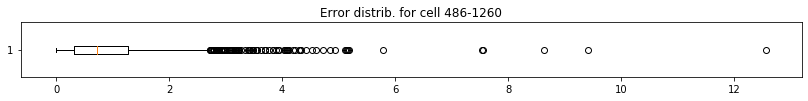

Mean Absolute Error =  0.9309187532675387
iteration =  9
486-1261


KeyboardInterrupt: 

In [11]:
# choose a number of time steps for the window
count = 0
error_per_cell = {}
all_cell_difference = np.array([])
dict2data = {}
for cell, df_i in agg_by_cell:
    print(cell)
    series = df_i['nr_people'].values
    
    # split into samples
    X, y = split_sequence(series, n_steps)
    
    # split into train and test sets
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
    train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=1)
    #print(len(train_X), len(train_y), len(test_X), len(test_y), len(val_X), len(val_y))
    
    # define model
    model = Sequential()
    model.add(Dense(500, activation='relu', input_dim=n_steps)) 
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam', metrics=[metrics.mae, 'accuracy'])
    model.fit(train_X, train_y, epochs=300, verbose=0)
    
    
    # compute error
    predicted = np.array([])

    for i in range(len(val_X)):
        x_input = val_X[i].reshape((1, n_steps))
        yhat = model.predict(x_input, verbose=0)
        predicted = np.append(predicted, yhat[0]) 

    expected = val_y
    # abs difference
    difference = abs((expected - predicted))
    
    # analytical data
    #all_cell_difference = np.append(all_cell_difference, difference)
    
     # collect data 2 dictionary
    minimum = np.amin(difference)   
    per75 = np.percentile(difference, 75)
    per50 = np.percentile(difference, 50)
    per25 = np.percentile(difference, 25)
    maximum = np.amax(difference)
    l5i = [minimum, per25, per50, per75, maximum]
    dict2data[cell] = l5i
    
    # show boxplot
    plt.figure(figsize = (14,1))
    plt.boxplot(difference, vert= False);
    plt.title('Error distrib. for cell '+str(cell))    
    plt.show()
    print('Mean Absolute Error = ', np.mean(difference))
    
    # controll
    count +=1
    print('iteration = ', count)
    #if count > 4: break

In [ ]:
with open('error_data_4_MLP_1StepForecast.csv', 'w') as f:
    for key, value in dict2data.items():
        f.write('%s:%s\n' % (key, value))

In [ ]:
from h5py import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)